{{ badge }}

# The Shooting Method for Solving BVPs

Let's go back to that pirate defense problem from last class. We figured out that it wasn't possible to hit the pirate ship with a cannonball speed of 40 m/s, regardless of how we aimed the cannon. Let's try and solve this again using the same method we used before for finding steady states to a problem, `root`.

\begin{align}
\frac{d}{dt}\begin{bmatrix}x\\z\\v_x\\v_z \end{bmatrix} = 
\begin{bmatrix} v_x\\v_z\\-rv_x\\-rv_z-g\end{bmatrix} \rightarrow \text{physics with air friction}
\end{align}
\begin{align}
x(t=0) = 0\\
z(t=0) = H\\
z(x=L) = 0 
\end{align}



Text(0.5, 0, 'Height [m]')

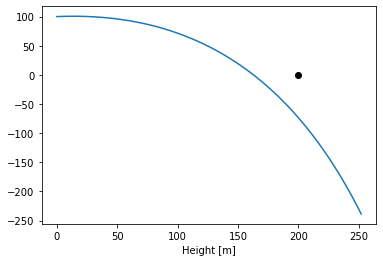

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.8 #m/s^2
r = 0.1 #1/s

def diff_eq(t, y):
  x, z, vx, vz = y

  return [vx,
          vz,
          -r*vx,
          -r*vz-g]

tspan = [0, 10] # t=0s to 10s

v = 40 
theta = 5/360*2*np.pi
y0 = [0,100,v*np.cos(theta), v*np.sin(theta)]
t_eval = np.linspace(0,10)

sol = solve_ivp(diff_eq, tspan, y0, t_eval=t_eval)

# plot z vs x
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(200,0,'ok')
plt.xlabel('Distance [m]')
plt.xlabel('Height [m]')
# plt.ylim([0,150])




## Reformulate the ODE

As posed, this is a little difficult to solve, since we don't know exactly how long to integrate for to hit the pirate ship. Let's solve for all of the variables in terms of derivatives with respect to the horizontal position. 

\begin{align}
\frac{d}{dx}\begin{bmatrix}x\\z\\v_x\\v_z \end{bmatrix} =\frac{dt}{dx}\frac{d}{dt}\begin{bmatrix}x\\z\\v_x\\v_z \end{bmatrix}= \frac{1}{v_x}\frac{d}{dt}\begin{bmatrix}x\\z\\v_x\\v_z \end{bmatrix}=\frac{1}{v_x}\begin{bmatrix} v_x\\v_z\\-rv_x\\-rv_z-g\end{bmatrix} =
\begin{bmatrix} 1\\v_z/v_x\\-r\\(-rv_z-g)/v_x\end{bmatrix} 
\end{align}

We don't even need the first equation anymore (of course $d/dx(x)=1$), so we're left with 
\begin{align}
\frac{d}{dx}\begin{bmatrix}z\\v_x\\v_z \end{bmatrix} =
\begin{bmatrix} v_z/v_x\\-r\\(-rv_z-g)/v_x\end{bmatrix} 
\end{align}


Text(0.5, 0, 'Height [m]')

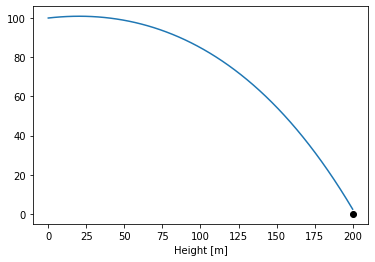

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.8 #m/s^2
r = 0.1 #1/s

def diff_eq(x, y):
  z, vx, vz = y

  return [vz/vx,
          -r,
          (-r*vz-g)/vx]

xspan = [0, 200] # x=0 m to 200 m

v = 49
theta = 5/360*2*np.pi
y0 = [100,v*np.cos(theta), v*np.sin(theta)]
x_eval = np.linspace(0,200)

sol = solve_ivp(diff_eq, xspan, y0, t_eval=x_eval)

# plot z vs x
plt.plot(sol.t, sol.y[0,:])
plt.plot(200,0,'ok')
plt.xlabel('Distance [m]')
plt.xlabel('Height [m]')
# plt.ylim([0,150])




Great! Now all we have to do is figure out the final height at x=200, and make that equal to zero. First, let's just see what the final height is at x=200.

In [0]:
print('The final height is %1.2f m'%sol.y[0,-1]) 

The final height is 2.41 m


Let's see what happens when we try to use 40 m/s now. Try going even lower. What do you see? *What* happens?

The final height is 0.10 m


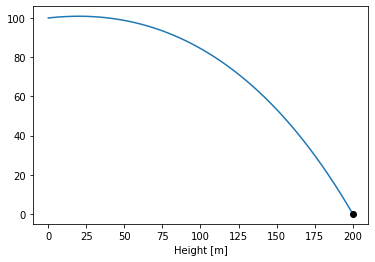

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.8 #m/s^2
r = 0.1 #1/s

def diff_eq(x, y):
  z, vx, vz = y

  return [vz/vx,
          -r,
          (-r*vz-g)/vx]

xspan = [0, 200] # x=0 m to 200 m

v = 48.6
theta = 5/360*2*np.pi
y0 = [100,v*np.cos(theta), v*np.sin(theta)]
x_eval = np.linspace(0,200)

sol = solve_ivp(diff_eq, xspan, y0, t_eval=x_eval, rtol=1e-8, atol=1e-6)

# plot z vs x
plt.plot(sol.t, sol.y[0,:])
plt.plot(200,0,'ok')
plt.xlabel('Distance [m]')
plt.xlabel('Height [m]')

print('The final height is %1.2f m'%sol.y[0,-1]) 

Great! Now all we have to do is figure out the final height at x=200, and make that equal to zero. First, let's just see what the final height is at x=200.

## Root finding to solve the BVP

Ok, now we're in a great position to find the exact angle or initial conditions that will solve this BVP. Let's remind ourselves how `root` works. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html

Root will take a function $\vec{y}=f(\vec{x})$, and try to find the $\vec{x}$ such that $\vec{y}=0$. If we can phrase our problem in terms of this one, `root` will give us the answer!



In [0]:
def boundary_conditions(x): 

  v, theta_deg = x

  theta = theta_deg/360*2*np.pi

  y0 = [100,v*np.cos(theta), v*np.sin(theta)]
  x_eval = np.linspace(0,200)

  sol = solve_ivp(diff_eq, xspan, y0, t_eval=x_eval, rtol=1e-8, atol=1e-6)

  return [sol.y[0,-1], 
          0]

from scipy.optimize import root

root_sol = root(boundary_conditions, [50,60])


We guessed 49 m/s, and it found that actually 48.6 m/s worked best for hitting the pirate ship. Let's plot the guess solution and the final solution. 

[49.4639362  5.       ]
The final height is 5.0000 m


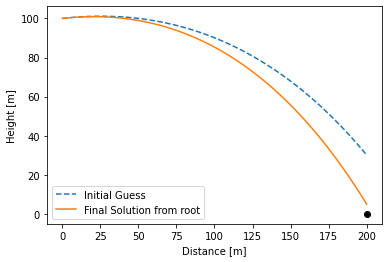

In [0]:
# plot the solution based on the initial guess
xspan = [0, 200] # x=0 m to 200 m
v, theta_deg = [55,5]
theta = theta_deg/360*2*np.pi
y0 = [100,v*np.cos(theta), v*np.sin(theta)]
x_eval = np.linspace(0,200)
sol = solve_ivp(diff_eq, xspan, y0, t_eval=x_eval, rtol=1e-8, atol=1e-6)
# plot z vs x
plt.plot(sol.t, sol.y[0,:],'--', label='Initial Guess')

# plot the solution based on the identified solution
xspan = [0, 200] # x=0 m to 200 m
root_sol = root(boundary_conditions, [55,5])
v, theta_deg = root_sol.x
theta = theta_deg/360*2*np.pi
y0 = [100,v*np.cos(theta), v*np.sin(theta)]
x_eval = np.linspace(0,200)
sol = solve_ivp(diff_eq, xspan, y0, t_eval=x_eval, rtol=1e-8, atol=1e-6)
# plot z vs x
plt.plot(sol.t, sol.y[0,:], label='Final Solution from root')

plt.plot(200,0,'ok')
plt.xlabel('Distance [m]')
plt.ylabel('Height [m]')
plt.legend()
print(root_sol.x)
print('The final height is %1.4f m'%sol.y[0,-1]) 

There are many initial conditions that will satisfy the final boundary conditions in this problem. 

[50.30076065 50.        ]
The final height is -0.0000 m


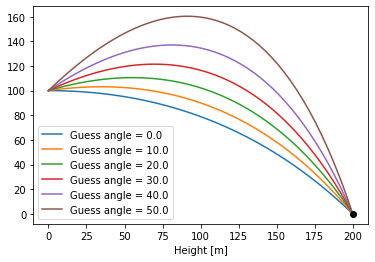

In [0]:
for theta_deg_guess in range(0, 60, 10):
    
  root_sol = root(boundary_conditions, [50,theta_deg_guess])

  xspan = [0, 200] # x=0 m to 200 m

  v, theta_deg = root_sol.x

  theta = theta_deg/360*2*np.pi
  y0 = [100,v*np.cos(theta), v*np.sin(theta)]
  x_eval = np.linspace(0,200)

  sol = solve_ivp(diff_eq, xspan, y0, t_eval=x_eval, rtol=1e-8, atol=1e-6)

  # plot z vs x
  plt.plot(sol.t, sol.y[0,:], label='Guess angle = %1.1f'%theta_deg_guess)


plt.plot(200,0,'ok')
plt.xlabel('Distance [m]')
plt.xlabel('Height [m]')
plt.legend()
print(root_sol.x)
print('The final height is %1.4f m'%sol.y[0,-1]) 

## Summary of the shooting method to solve BVPs

This method of solving BVPs is called the shooting method, because you guess initial conditions and shoot over to other values to check whether they work or now. The key steps are:
1. You have to be able to solve the IVP first, assuming you know the initial conditions. If you have mistakes in the IVP, you won't get any farther than that.
2. Once you have the IVP integration working, you can try adjusting the initial conditions a little to see what happens and make sure everything is working correctly.
3. When you are confident about your solution, write a function for `root` that takes in initial conditions you have to guess, and returns all zeros when the boundary conditions are satisfied. This could be integrating to a fixed point, and calculating how far the boundary conditions are from the desired values.
4. Use `root` to vary the initial conditions and find a solution. 
5. Try a few different guesses for the initial conditions, to see if there are multiple solutions available.

This is a more complex problem then we've done in the past, because it requires three different levels of numerics:
* numpy/arrays/etc for coding the system of differential equations
* `solve_ivp` to integrate those differential equations
* `root` to adjust initial conditions and solve the problem.

There are other methods of solving BVPs numerically which use a grid of points from the initial to final independent variable. We won't cover those here, but you can look into them with `solve_bvp`. It will handle the boundary condition solution for you, but the downside is that you have to worry about a mesh of points. 



# Chemical Engineering Example


<img src="https://docs.google.com/drawings/d/e/2PACX-1vSf2jVdqbl_bfEDKJRTToTinA-WikP4MJbZv8E-t8GKjxe9CNSQMRdO9Vinb2YBDz8qLcpk1Fi5I2iq/pub?w=106&h=182">
\begin{align}
2A \leftrightarrow B\\
B \rightarrow 2C
\end{align}
At $t=0$, operator add 5 mol of $A$ into a 5L vessel that contained an unknown amount of $B$ and $C$ beforehand. After 5 minutes, we stopped the reactor and measured
\begin{align}
C_B = 0.02 M\\
C_C = 2 M
\end{align}

How much $B$/$C$ was initially in tank?\
How much A left at the end?

First, let's get this into a set of differential equations
\begin{align}
\frac{dC_A}{dt} &= -2k_1C_A^2+2k_{-1}C_B\\
\frac{dC_B}{dt} &= k_1C_A^2-k_{-1}C_B - k_2C_B\\
\frac{dC_C}{dt} &= 2k_2C_B 
\end{align}

We also need the boundary conditions.
\begin{align}
C_A(t=0) &= 1M\\
C_B(t=t_f) &= 0.02M\\
C_C(t=t_f) &= 2 M\\
k_1 =1 [1/M/min], k_2 &= 1[1/min], k_{-1}=0.2[1/min]
\end{align}

This is a set of nonlinear coupled ODE's, so it would be hard to solve analytically. Our best best is to use numerical methods, but the boundary conditions are specified at both t=0 and $t=t_f$. We're going to have to use `solve_ivp` and `root`.


array([0.13361974, 0.02548074, 2.31541879])

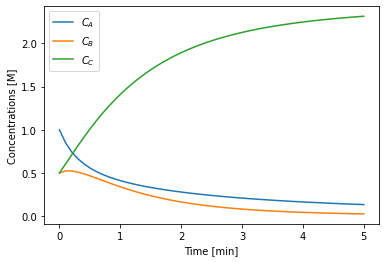

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

k1 = 1 #1/M/min
k2 = 1 #1/min
km1 = 0.2 #[1/min]

def diff_eq(t,C):

  Ca, Cb, Cc = C

  return [-2*k1*Ca**2 + 2*km1*Cb,
          k1*Ca**2 - km1*Cb - k2*Cb,
          2*k2*Cb]

t_span = [0, 5] #min
t_eval = np.linspace(0,5)
y0 = [1, 0.5, 0.5] #M

sol = solve_ivp(diff_eq, t_span, y0, t_eval=t_eval)

plt.plot(sol.t, sol.y.T)
plt.legend(['$C_A$','$C_B$','$C_C$'])
plt.xlabel('Time [min]')
plt.ylabel('Concentrations [M]')

sol.y[:,-1]

Now, specify a function that will take in one vector $x$ containing the initial conditions for $C_B$ and $C_C$ and return how far the final conditions for those concentrations are from the known final values. Use this with `root` to find the initial conditions and solve for the final concentration profile. 

In [0]:

def boundary_conditions(C):
  Cb0, Cc0 = C

  # solve the diff eq with Cb0, Cc0 as init. cond.
  t_span = [0, 5] #min
  y0 = [1, Cb0, Cc0] #M
  sol = solve_ivp(diff_eq, t_span, y0)

  # get the final value of Cb, Cc

  #sol.y = 3xN array, N is the number of time points
  Ca = sol.y[0,-1] # should be Ca(tf)
  Cb = sol.y[1,-1] # should be Cb(tf)
  Cc = sol.y[2,-1] # should be Cc(tf)

  return [Cb-0.02, #something that is zero when Cb(t=tf)=0.02 -> Cb(t=tf)-0.02 = 0
          Cc-2] #something that is zero when Cc(t=tf)=2M

from scipy.optimize import root

root_sol = root(boundary_conditions, [0.5, 0.5])
root_sol

    fjac: array([[-0.00633812, -0.99997991],
       [ 0.99997991, -0.00633812]])
     fun: array([-2.42063314e-14,  8.41104963e-13])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.21185251e-10, -1.88341600e-11])
       r: array([-1.94883989, -1.00119322, -0.00638102])
  status: 1
 success: True
       x: array([0.06078356, 1.04064144])

array([0.12220856, 0.02      , 2.        ])

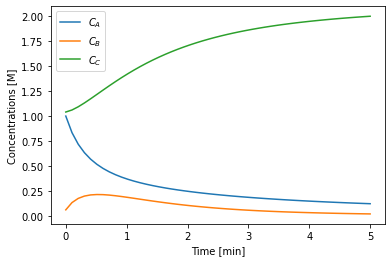

In [0]:
Cb0, Cc0 = root_sol.x
t_span = [0, 5] #min
t_eval = np.linspace(0,5)
y0 = [1, Cb0, Cc0] #M

sol = solve_ivp(diff_eq, t_span, y0, t_eval=t_eval)

plt.plot(sol.t, sol.y.T)
plt.legend(['$C_A$','$C_B$','$C_C$'])
plt.xlabel('Time [min]')
plt.ylabel('Concentrations [M]')

sol.y[:,-1] # C = [?, 0.02, 2] M